<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/Exercises/03_Computer_vision_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.What are 3 areas in industry where computer vision is currently being used?
Here is the completion of the uses of computer vision:

1. Computer vision is used in security cameras to detect intruders, unusual activities, and identify individuals.
2. Used in the medical field to detect abnormalities in X-ray photographs and assist in diagnosing diseases.
3. Used by smart vehicle companies like Tesla to enable autonomous driving, detect obstacles, and enhance navigation systems.

## 2. What is overfitting in machine learning
Overfitting is when a machine learning model trains too well on the training data but performs too poorly on new data.


## 3. Ways tp prevent overfitting in machine learning

1. Early stopping.
Early stopping pauses the training phase before the model learns of the noice in the training data
2. Prunning
In decision trees, reducing the size of the tree by removing areas that provide little impact.
3. Simplyfying the model.
Reducing the complexity of the model by reducing the number of features or using simpler algorithms

## 4. Load the torchvision.datasets.MNIST() train and test datasets.

In [75]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#import matplotlib for visualization
import matplotlib .pyplot as plt


In [76]:
#set up training data
train_data = datasets.MNIST(
    root="data",
    train=True, #get training data
    download=True,
    transform=ToTensor(),
    target_transform=None,
)
# set up the testing data
test_data = datasets.MNIST(
    root="data",
    train=False, #get test data only
    download=True,
    transform=ToTensor()
)

In [77]:
# check out the first sample of training data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [78]:
# check the input and output shapes of the data
image.shape

#[color_channels=1, height=28, width=28]

torch.Size([1, 28, 28])

In [79]:
#check out the number of samples of train and test data
len(train_data.data),len(train_data.targets) , len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [80]:
#find the available classes of data
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 5. Visualize at least 5 different samples of the MNIST training dataset.

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

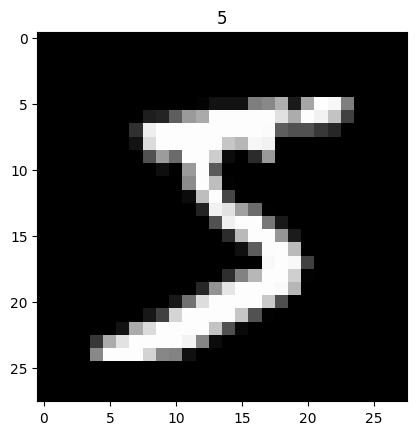

In [81]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)

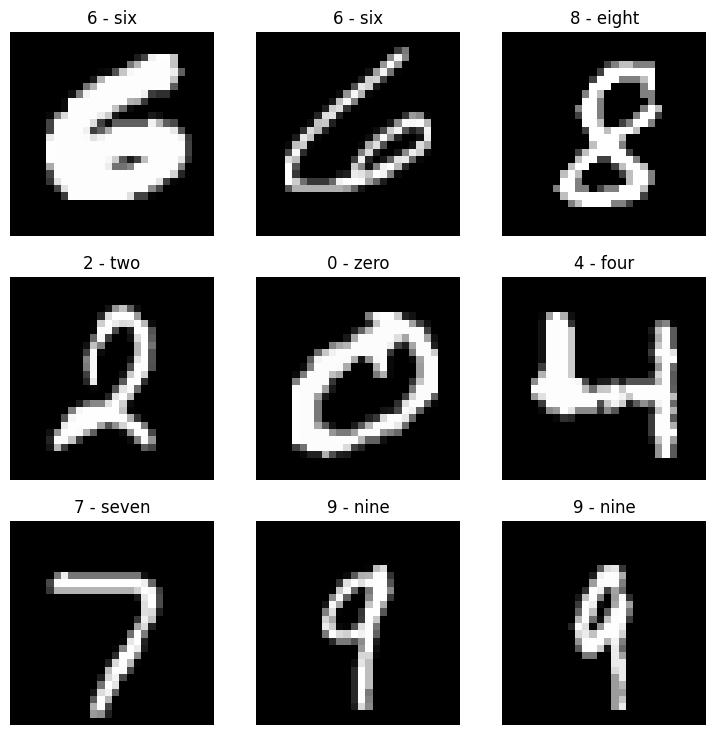

In [82]:
#visualize more
torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows, cols = 3,3

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 6. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [83]:
from torch.utils.data import DataLoader

#set the batch size
BATCH_SIZE = 32

#turn datasets into iterables
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c73edc3fc10>, <torch.utils.data.dataloader.DataLoader object at 0x7c73edc3ee00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [84]:
#check out whats inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 7 Building a Convolutional Neural Network

In [85]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [86]:
class MNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward (self, x: torch.Tensor):
    x= self.conv_block_1(x)
    x= self.conv_block_2(x)
    x= self.classifier(x)
    return x

    #instanciate the model



In [87]:
#instanciate the model
torch.manual_seed(42)
model_1 = MNISTModelV1(input_shape=1,
                         hidden_units=10,
                         output_shape=len(class_names)).to(device)

model_1

MNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [88]:
image.shape

torch.Size([1, 28, 28])

In [89]:
rand_image_tensor = torch.rand(size=[1,28,28])
rand_image_tensor.shape
model_1(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

## 7. Train the model for 5 epochs on cpu and gpu and see how long it takes

In [90]:
%%time
from tqdm.auto import tqdm

#train on cpu
model_cpu = MNISTModelV1(input_shape=1,
                         hidden_units=10,
                         output_shape=10).to('cpu')

#create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

#training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_cpu.train()

    #put data on cpu
    X,y = X.to('cpu'), y.to('cpu')

    #forward pass
    y_pred = model_cpu(X)

    #loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #step the optimizer
    optimizer.step()

  #adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  #testing loop
  test_loss_total = 0

  #put model on eval mode
  model_cpu.eval()

  #turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):

      #put data on the cpu
      X_test, y_test = X_test.to('cpu'), y_test.to('cpu')

      #do the forward pass on test data
      test_pred = model_cpu(X_test)

      #calculate the loss
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

      #adjust test loss
    test_loss_total /= len(test_dataloader)

#print out whats happening
  print(f"Epoch: {epoch} | Loss: {train_loss: .3f} | test loss: {test_loss_total: .3f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss:  0.466 | test loss:  0.106
Epoch: 1 | Loss:  0.093 | test loss:  0.062
Epoch: 2 | Loss:  0.070 | test loss:  0.051
Epoch: 3 | Loss:  0.059 | test loss:  0.049
Epoch: 4 | Loss:  0.052 | test loss:  0.042
CPU times: user 5min 5s, sys: 502 ms, total: 5min 6s
Wall time: 5min 9s


## 8 Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label

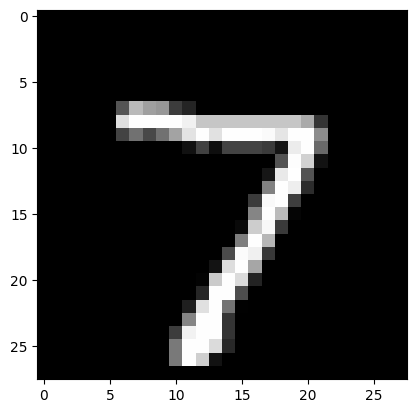

In [91]:
#make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap='gray')

In [92]:
# logits -> prediction probabilities -> prediction labels
model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7])

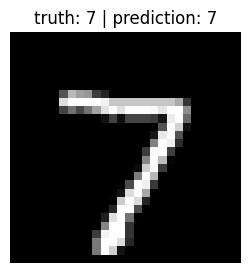

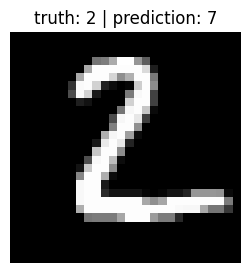

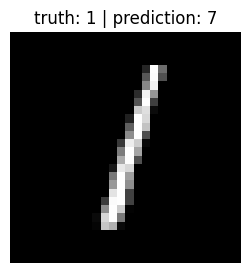

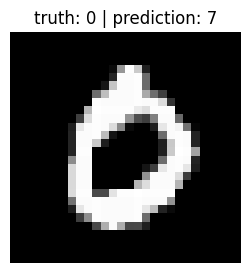

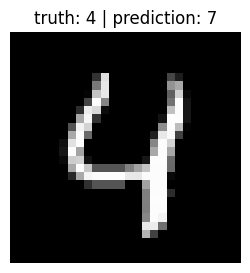

In [93]:
num_to_plot = 5
for i in range(num_to_plot):
  #get image and test labels from test data
  img = test_data[i][0]
  label = test_data[i][1]

  #make prediction on image
  model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  #plot the image and prediction
  plt.figure(figsize = (3,3))
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(f"truth: { label} | prediction: {model_pred_label.cpu().item()}")
  plt.axis(False)

## 9 Plot a confusion matrix comparing your model's predictions to the truth labels.

In [94]:
# see if torchmetrics exist if not install it

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: mlxtend.__version__")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version must be at least 0.19.0"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: mlxtend.__version__")

mlxtend version: mlxtend.__version__


In [95]:
#make predictions across all test data
from tqdm.auto import tqdm
model_cpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_cpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [96]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

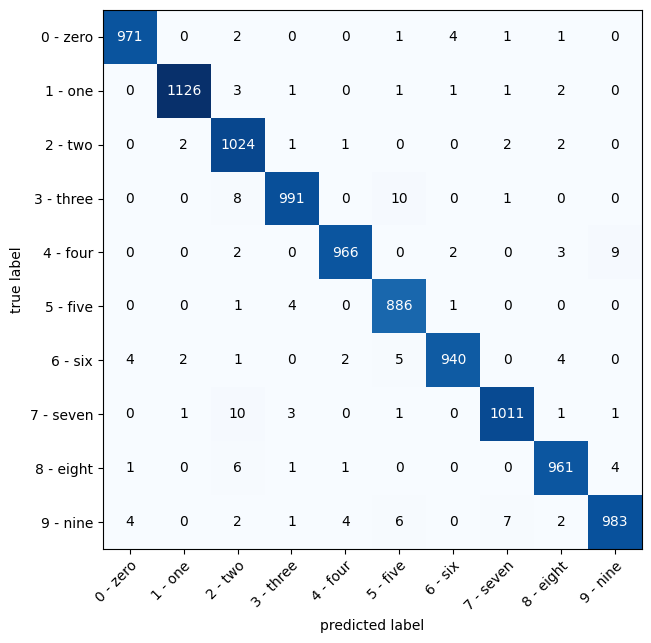

In [98]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#set up confusion matrix
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

#plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 10. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [99]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [100]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=64,
    kernel_size=3,
    stride=2,
    padding=1
)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv2d_layer = conv_layer(random_tensor)
print(f" random tensor after passing through conv2d layer: {random_tensor_through_conv2d_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
 random tensor after passing through conv2d layer: torch.Size([1, 64, 32, 32])
